# Project 1

TODO: add small description, imports and comments once the functions are written

In [43]:
#import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import timeit

Firstly, we present different functions used for solving linear regression. All of the functions use mean squared error, with or without the regularization term. Some of these functions are explicitly solving linear regression, while others are using different optimization algorithms (GD, SGD) in order to minimize the loss function. In each function parameters $X,y$ (in the code tx,y) represent the data. We assume that the first column of $X$ consists only of ones, which represents the constant attribute. There could be some additional parameters, such as initial parameter of regression, step size, maximal number of iterations etc. 

In order to solve linear regression problem, we want to minimize loss function $L_{MSE}$ represented by a mean squared error: $L_{MSE}(w) = \frac{1}{2N}\left \| y-Xw \right \|_2^2 $, where $N$ represents number of data points. In order to solve this optimization problem we will use gradient descent: $w_t = w_{t-1} - \gamma \triangledown L_{MSE}(w_{t-1}) = w_{t-1} + \frac{\gamma}{N} X^{T}(y-Xw_{t-1})$, for $t \geq 1$.

In [44]:
# Linear regression using gradient descent
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def least_squares_GD(y, tx, initial_w,max_iters, gamma):
    N, D = tx.shape
    
    # Iterations of gradient descent
    w = initial_w
    for _ in range(max_iters):
        grad = -np.dot(tx.T, (y - np.dot(tx,w))) / N
        w = w - gamma * grad
        
    # Calculating the loss
    r = y - np.dot(tx,w)
    loss = np.dot(r,r) / (2*N)
    
    return w, loss

In [45]:
#Linear regression using stochastic gradient descent
def least_squares_SGD(y, tx, initial_w,max_iters, gamma, frequency=0):
    N, D = tx.shape
    
    loss = []
    
    
    # Iterations of stochastic gradient descent
    w = initial_w
    for i in range(max_iters):
        k = random.randint(0,N-1)
        grad = -(y[k]-np.dot(tx[k,:], w))*tx[k,:]
        w = w - gamma * grad
        # Calculating the loss
        if frequency != 0 and i % frequency == 0:
            r = y - np.dot(tx,w)
            loss.append(np.dot(r,r) / (2*N))
            
    r = y - np.dot(tx,w)
    loss.append(np.dot(r,r) / (2*N))        
    
    return w, loss

'''
def least_squares_SGD(y, tx, initial_w,max_iters, gamma):
    N, D = tx.shape
    
    # Iterations of stochastic gradient descent
    w = initial_w
    for _ in range(max_iters):
        k = random.randint(0,N-1)
        grad = -(y[k]-np.dot(tx[k,:], w))*tx[k,:]
        w = w - gamma * grad
        
    # Calculating the loss
    r = y - np.dot(tx,w)
    loss = np.dot(r,r) / (2*N)
    
    return w, loss
'''

'\ndef least_squares_SGD(y, tx, initial_w,max_iters, gamma):\n    N, D = tx.shape\n    \n    # Iterations of stochastic gradient descent\n    w = initial_w\n    for _ in range(max_iters):\n        k = random.randint(0,N-1)\n        grad = -(y[k]-np.dot(tx[k,:], w))*tx[k,:]\n        w = w - gamma * grad\n        \n    # Calculating the loss\n    r = y - np.dot(tx,w)\n    loss = np.dot(r,r) / (2*N)\n    \n    return w, loss\n'

In [46]:
N = 1000
D = 5
X = np.random.randn(N,D)
y = np.random.randn(N)
w = np.zeros(D)
gamma = 0.0005
print(least_squares_GD(y,X,w,10000,gamma))
print(least_squares_SGD(y,X,w,1000000,gamma))

(array([-0.01874844,  0.02772963,  0.03241278, -0.01671047,  0.00833947]), 0.4983209284328381)
(array([ 0.00047842,  0.02104589,  0.02540354, -0.02825321,  0.00788516]), [0.4986178962191842])


In [47]:
#Least squares regression using normal equations
def least_squares(y, tx):
    N, _ = tx
    
    # Calculating w
    w = (np.linalg.inv((tx.T).dot(tx)).dot(tx.T)).dot(y)
    
    #Calculating loss
    r = y - tx.dot(w_opt)
    loss = np.dot(r,r)/(2*N)
    return w_opt, loss

Ridge regression implies that loss function is proportional to the sum of mean square error and regularization term that depends on $l_2$ squared norm of parameter $w$. Let $L_{rr}$ be the loss function, than: $L_{rr}(w) = \frac{1}{2N}(\left \| y-Xw \right \|_2^2 + \lambda \left \| w \right \|_2^2)$, where $N$ represents number of data points. Moreover,
$\triangledown L_{rr}(w) = \frac{1}{N}(- X^{T}(y-Xw)+\lambda w)$. After putting $\triangledown L_{rr} = 0$, we obtain:
$$w_* = (X^{T}X+\lambda Id)^{-1}X^{T}y,$$
where $w_*$ minimizes the loss function $L_{rr}$.

In [48]:
#Ridge regression using normal equations
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
#lambda_:     regularization parameter

def ridge_regression(y, tx, lambda_):
    N,D = tx.shape
    
    A = np.dot(tx.T, tx) + lambda_ * np.ones(D)
    B = np.linalg.inv(A)
    w = np.dot(np.dot(B,tx.T), y)
    
    # Calculating loss
    r = y - np.dot(tx,w)
    loss = (np.dot(r,r)+ lambda_ * np.dot(w,w)) / (2*N)
    
    return w, loss
    
    

In [49]:
# Returns exp(x)/(1+exp(x))
# x is scalar or numpy array
def sigmoid(x):
    tmp = np.exp(x)
    return tmp/(1+tmp)

#Logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss
def logistic_regression(y, tx, initial_w,max_iters, gamma):
    N, _ = tx.shape
    w = initial_w
    
    for _ in range(max_iter):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)


def logistic_regression_GD(y, tx, initial_w,max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx)
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)

In [89]:
#Regularized logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# lambda:     scalar representing regularization parameter
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss
def reg_logistic_regression(y, tx, lambda_ ,initial_w, max_iters, gamma, frequency=0):
    N, _ = tx.shape
    w = initial_w
    
    loss = []
    
    for i in range(max_iter):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]+lambda_*w
        w = w - gamma*grad
        if frequency != 0 and i % frequency == 0:
            tmp = np.dot(tx,w)
            loss.append(- np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp))))
            
    ### 
    tmp = np.dot(tx,w)
    loss.append(- np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp))))
    
    return w, loss

def reg_logistic_regression_GD(y, tx, lambda_ ,initial_w, max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx) + lambda_*w
        w = w - gamma*grad
    
    ### 
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return w, loss

In [90]:
### Example for logistic regression
'''
N = 100
D = 2

category = lambda x : int(np.dot(x, np.ones(2)) > 0)

X = np.random.rand(N,D)
X = X - 0.5
Y = np.array([category(x) for x in X])
X += (np.ones((D, N))*Y).T


X0 = X[np.argwhere(Y==0).flatten()]
X1 = X[np.argwhere(Y==1).flatten()]

const_attribute = np.ones((N,1))
tx = np.concatenate((const_attribute, X), axis=1)
initial_w = np.array([0,0,0])
np.dot(tx, initial_w)

print(tx.shape)
w1 = logistic_regression(Y,tx, initial_w, 100000000, 0.001)
w2 = reg_logistic_regression(Y,tx, 1, initial_w, 10000000, 0.001) 
w3 = reg_logistic_regression_GD(Y,tx, 1, initial_w, 10000000, 0.001) 
print(w1)
print(w2)
print(w3)
'''

'\nN = 100\nD = 2\n\ncategory = lambda x : int(np.dot(x, np.ones(2)) > 0)\n\nX = np.random.rand(N,D)\nX = X - 0.5\nY = np.array([category(x) for x in X])\nX += (np.ones((D, N))*Y).T\n\n\nX0 = X[np.argwhere(Y==0).flatten()]\nX1 = X[np.argwhere(Y==1).flatten()]\n\nconst_attribute = np.ones((N,1))\ntx = np.concatenate((const_attribute, X), axis=1)\ninitial_w = np.array([0,0,0])\nnp.dot(tx, initial_w)\n\nprint(tx.shape)\nw1 = logistic_regression(Y,tx, initial_w, 100000000, 0.001)\nw2 = reg_logistic_regression(Y,tx, 1, initial_w, 10000000, 0.001) \nw3 = reg_logistic_regression_GD(Y,tx, 1, initial_w, 10000000, 0.001) \nprint(w1)\nprint(w2)\nprint(w3)\n'

# Loading data


In [173]:
path_train = './data/train.csv.zip'
path_test = './data/test.csv.zip'

train_data = pd.read_csv(path_train, compression='zip')
test_data = pd.read_csv(path_test, compression='zip')

In [174]:
train_data.shape

(250000, 32)

In [175]:
train_data.describe()


,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [176]:
train_data['Prediction'].unique()

array(['s', 'b'], dtype=object)

In [177]:
for column in train_data.columns:
    print(f'{column}: {len(train_data[column].unique())}')

train_data['PRI_jet_num'].unique()

Id: 250000
Prediction: 2
DER_mass_MMC: 108338
DER_mass_transverse_met_lep: 101637
DER_mass_vis: 100558
DER_pt_h: 115563
DER_deltaeta_jet_jet: 7087
DER_mass_jet_jet: 68366
DER_prodeta_jet_jet: 16593
DER_deltar_tau_lep: 4692
DER_pt_tot: 59042
DER_sum_pt: 156098
DER_pt_ratio_lep_tau: 5931
DER_met_phi_centrality: 2829
DER_lep_eta_centrality: 1002
PRI_tau_pt: 59639
PRI_tau_eta: 4971
PRI_tau_phi: 6285
PRI_lep_pt: 61929
PRI_lep_eta: 4987
PRI_lep_phi: 6285
PRI_met: 87836
PRI_met_phi: 6285
PRI_met_sumet: 179740
PRI_jet_num: 4
PRI_jet_leading_pt: 86590
PRI_jet_leading_eta: 8558
PRI_jet_leading_phi: 6285
PRI_jet_subleading_pt: 42464
PRI_jet_subleading_eta: 8628
PRI_jet_subleading_phi: 6286
PRI_jet_all_pt: 103559


array([2, 1, 0, 3])

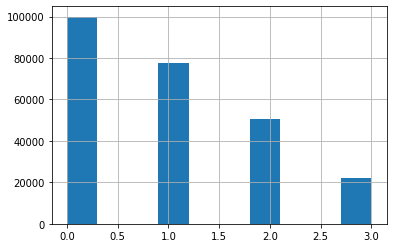

In [144]:
train_data['PRI_jet_num'].hist()
plt.show()

In [96]:
boson = train_data[train_data['Prediction']=='b']
spiner = train_data[train_data['Prediction']=='s']


In [97]:
test_data.shape
test_data['Prediction']

0         ?
1         ?
2         ?
3         ?
4         ?
         ..
568233    ?
568234    ?
568235    ?
568236    ?
568237    ?
Name: Prediction, Length: 568238, dtype: object

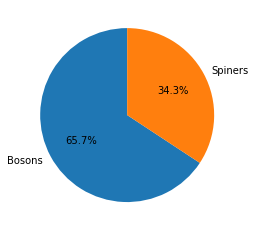

In [98]:
def plot_balance(x,y):
    labels = ['Bosons', 'Spiners']
    sizes = [x,y]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.show()

plot_balance(boson.shape[0], spiner.shape[0])

## Cleaning and transforming data

In [178]:
def transform_output_into_binary(y):
    a, b = np.unique(y)
    category = lambda x : int(x==a)
    new_y = np.array([category(i) for i in y])
    return new_y

def add_const_attribute(X):
    N, _ = X.shape
    tx = np.concatenate((np.ones((N, 1)), X), axis=1)
    return tx

y = transform_output_into_binary(train_data['Prediction'].values)
categorical_attr = train_data['PRI_jet_num'].values
tx = add_const_attribute(train_data.drop(['Prediction', 'Id'], axis=1).values)

y.shape, tx.shape

((250000,), (250000, 31))

# Standardizing data

[[   1.     138.47    51.655 ...    1.24    -2.475  113.497]
 [   1.     160.937   68.768 ... -999.    -999.      46.226]
 [   1.    -999.     162.172 ... -999.    -999.      44.251]
 ...
 [   1.     105.457   60.526 ... -999.    -999.      41.992]
 [   1.      94.951   19.362 ... -999.    -999.       0.   ]
 [   1.    -999.      72.756 ... -999.    -999.       0.   ]]


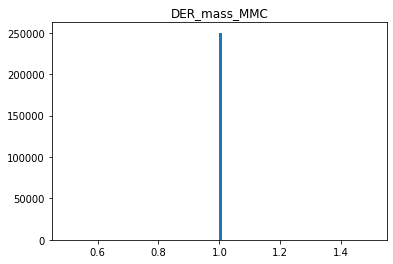

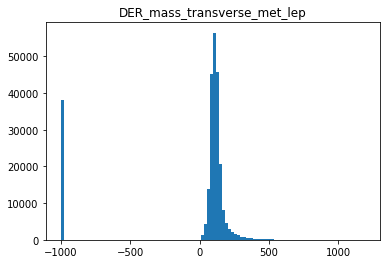

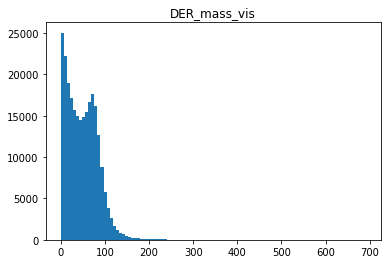

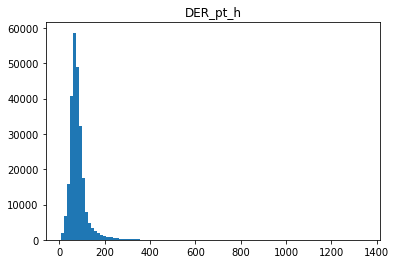

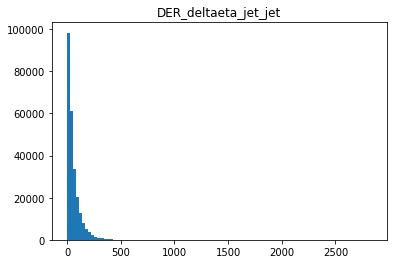

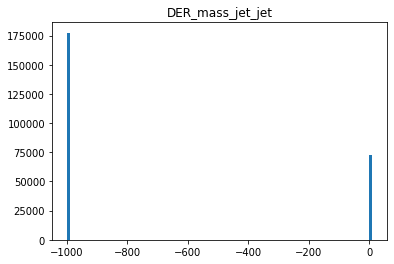

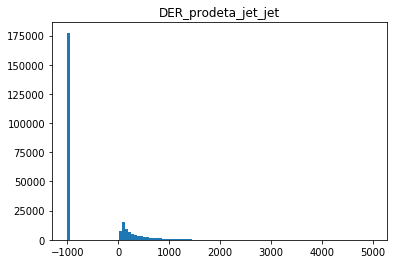

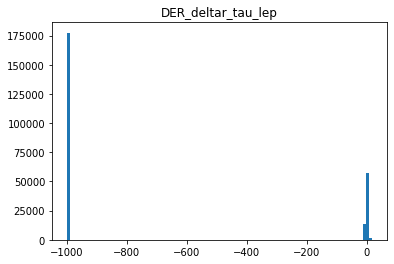

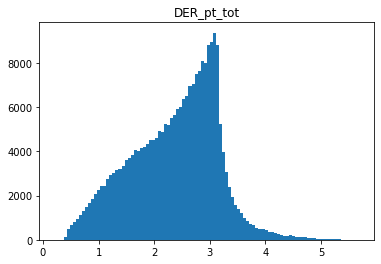

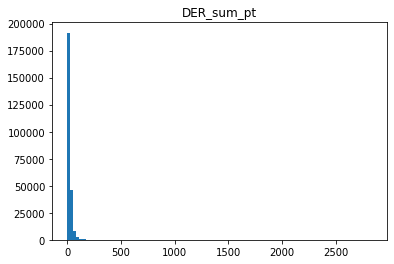

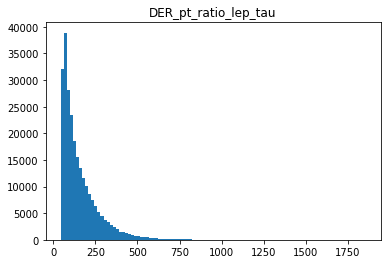

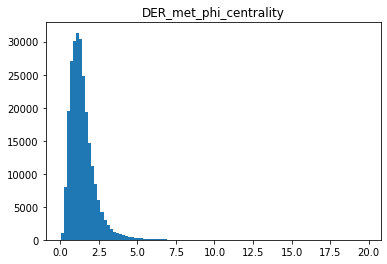

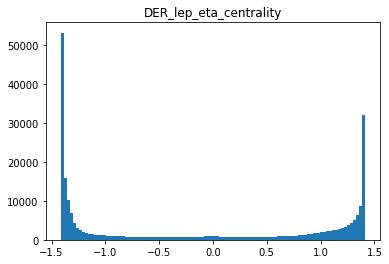

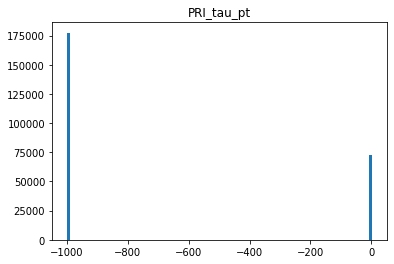

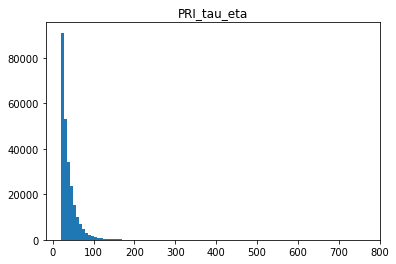

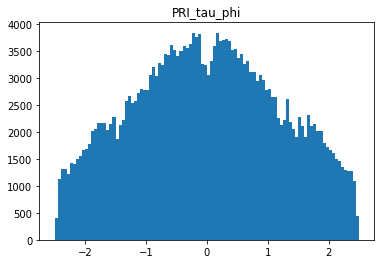

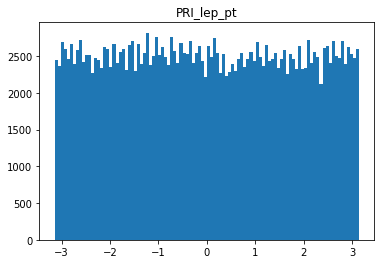

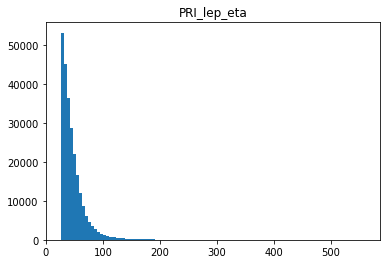

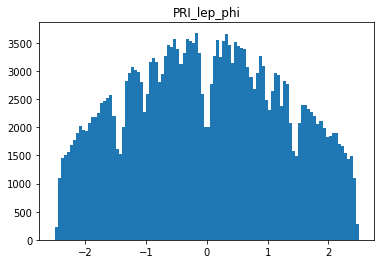

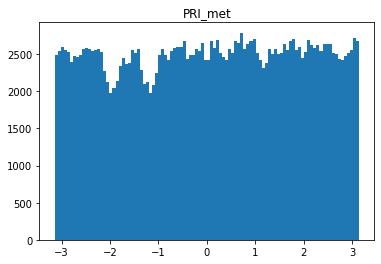

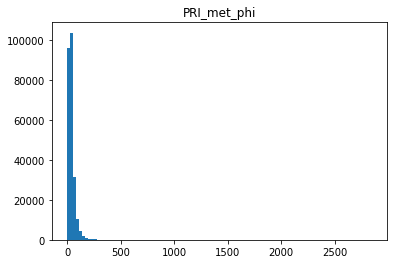

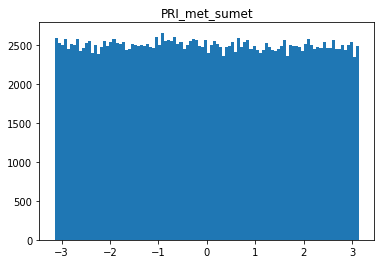

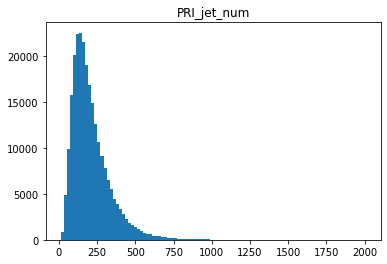

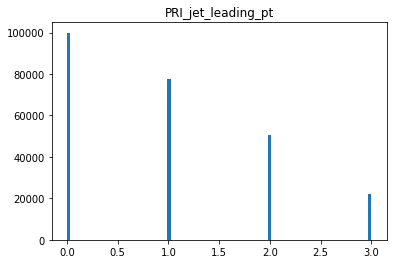

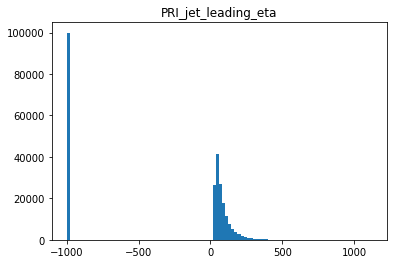

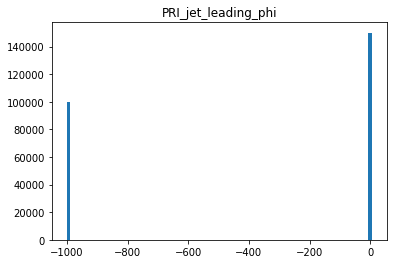

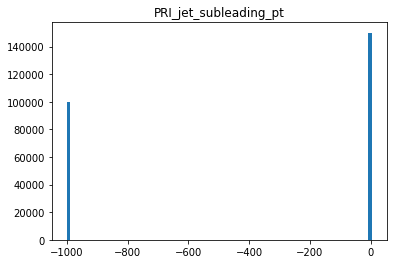

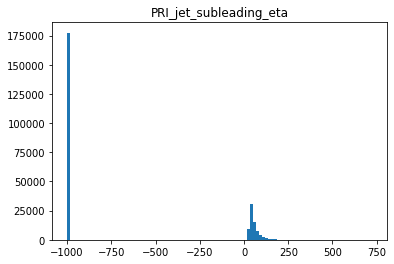

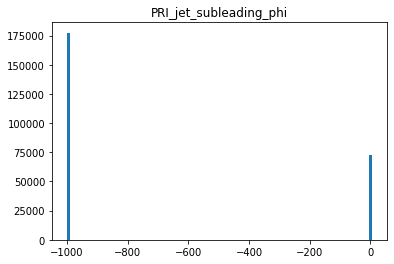

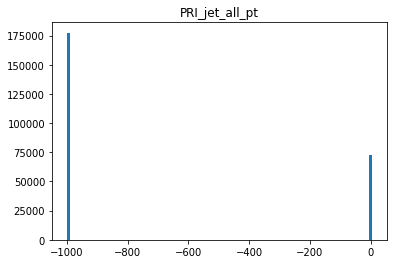

In [180]:
def standarize(x):
    N,D = x.shape
    
    for i in range(1,D):
        x_min = x[:,i].min()
        x_max = x[:,i].max()
        x[:,i] = (x[:,i]-x_min)/(x_max-x_min)
        
def normalize(x):
    N,D = x.shape
    
    for i in range(1,D):
        x_mean = x[:,i].mean()
        x_std = x[:,i].std()
        x[:,i] = (x[:,i]-x_mean)/x_std         
#normalize(tx)
print(tx)

i = 0
for column in train_data.columns:
    if column == 'Id' or column == 'Prediction':
        continue
    plt.hist(tx[:,i], bins=100)
    i+=1
    plt.title(column)
    plt.show()

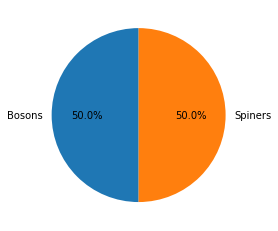

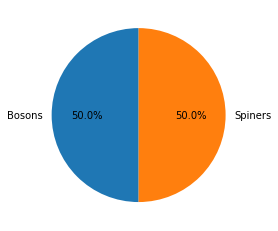

In [164]:
### needs to be implemented
### one issue that we have is that our data set is not balanced 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tx, y)


plot_balance(np.count_nonzero(y_train), np.count_nonzero(y_train==1)) 
plot_balance(np.count_nonzero(y_test), np.count_nonzero(y_test==1))
#print(np.count_nonzero(y_test), np.count_nonzero(y_test==1))
#print(np.count_nonzero(y_train), np.count_nonzero(y_train==1))
#train_data.shape

In [165]:
def predict(x, w):
    p = sigmoid(np.dot(x,w))
    return np.array([int(i>0.5) for i in p])

def evaluate(y,y_predict):
    return 1 - np.sum(abs(y-y_predict))/ len(y)     

def evaluate_on_set(w, x, y):
    y_predict = predict(x, w)
    return evaluate(y_predict, y)

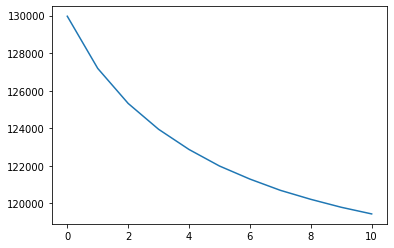

d=1: TRAIN precision: 0.668912
d=1: TEST precision: 0.6674720000000001
0.01213601601193659


In [ ]:
### Function for feature expansion x^2, x^3...x^d
def feature_expansion(x, d):
    
    x_wo_c = x[:, 1:]
    new_x = np.copy(x)
    curr = np.copy(x_wo_c)
    
    for i in range(2,d+1):
        curr = curr * x_wo_c
        new_x = np.concatenate((new_x, curr), axis = 1)

    return new_x



start = timeit.timeit()
loss = {}
w = {}
for d in range(1,5):
    curr_x_train = feature_expansion(x_train, d)
    curr_x_test = feature_expansion(x_test, d)
    
    D = curr_x_train.shape[1]
    lambda_ = 1
    max_iter = 1000000
    gamma = 0.000001
    if d in w:
        initial_w = w[d]
    else:
        initial_w = np.zeros(D)
    
    w[d], loss[d] = reg_logistic_regression(y_train, curr_x_train, lambda_, initial_w, max_iter, gamma, frequency=max_iter/10)
    plt.plot(loss[d])
    plt.show()
    
    print(f'd={d}: TRAIN precision: {evaluate_on_set(w[d],curr_x_train ,y_train)}')
    print(f'd={d}: TEST precision: {evaluate_on_set(w[d],curr_x_test ,y_test)}')
    end = timeit.timeit()
    print(end-start)
    start = timeit.timeit()



In [168]:
print(w[3])

[ 2.18609669e-02 -1.18021794e-02  5.66378657e-02 -1.17319024e-02
 -2.07742940e-02 -1.08655137e-02 -1.69957962e-02 -1.07150404e-02
 -1.25818586e-02  5.17849619e-03 -1.80371256e-02  4.08682864e-02
 -3.37702640e-02 -1.08263099e-02 -4.94000255e-02  5.35075638e-04
  6.82105962e-04  4.69740899e-03  1.35713683e-04 -7.91180257e-04
 -5.82294923e-03 -1.26624028e-03 -1.31398659e-02 -4.94514479e-03
 -6.17157299e-03 -4.87152479e-03 -4.86948603e-03 -1.08614602e-02
 -1.08113900e-02 -1.08080418e-02 -1.10543260e-02  3.92530727e-02
 -2.11979742e-03  6.30835423e-02 -8.10440015e-03  1.16922690e-02
 -1.23826698e-02  1.21620337e-02  5.11538304e-02  1.12573536e-02
  1.31126764e-02  1.66909632e-03  4.51454188e-03  1.18151702e-02
 -5.67233599e-03  4.39957954e-02  2.07943292e-02  9.20985300e-03
  4.93121729e-02  2.03657171e-02 -1.47535023e-02  1.94758960e-02
  2.12033278e-02  2.67301037e-02  2.16404531e-02  2.38526816e-02
  2.38564007e-02  1.16768849e-02  1.18615161e-02  1.18722249e-02
  1.48313880e-02 -8.40103

In [105]:
w = reg_logistic_regression(y_train, x_train, 0.1, initial_w, max_iter, gamma)
w

ValueError: shapes (30,) and (59,) not aligned: 30 (dim 0) != 59 (dim 0)

In [ ]:
ypredict = predict(tx,w[0])

In [291]:
w = reg_logistic_regression(y_train, x_train, 0.1, w[0], max_iter, gamma/10)

In [292]:
ypredict = predict(tx,w[0])

0.6126940608231158 0.5368258273891988


In [51]:
tx2 = np.concatenate((x_train, x_train*x_train, x_train*x_train*x_train), axis=1)
print(tx2.shape)
_, D = tx2.shape 
w = reg_logistic_regression(y_train, tx2, 0.01, 0*np.ones(D), max_iter, gamma)

(187500, 90)


In [52]:
ypredict = predict(tx2,w[0])

0.9040193732822437 0.30417984780936713


In [53]:
tx3 = np.concatenate((x_test, x_test*x_test, x_test*x_test*x_test), axis=1)
ypredict = predict(tx3, w[0])

0.9138843770869157 0.3262921244419116


In [56]:
sum(abs(ypredict-y_test))/len(y_test)


0.31576